<a id="top"></a>
# UK Book Publishing Analysis
---

Working in publishing is a tough profession and many people who want to work in the industry do not know what salary they can expect when starting out. In this analysis, we will analyse the self-reported salaries of people who work at different levels within the publishing industry in the UK. We will explore patterns in the data and also try to develop a model that we can use to predict salary based on a selected set of features.

## Contents
---

**1.  [Summary of Findings](#summary_of_findings)** <br>
**2.  [Statistical Summary](#statistical_summary)** <br>
**3.  [About the Data](#about_the_data)** <br>
**4.  [Imports & Data Reading](#imports_and_data_reading)** <br>
**5.  [Data Checking](#data_checking)** <br>
**6.  [Data Cleaning](#data_cleaning)** <br>
**7.  [EDA](#eda)** <br>
**8.  [Model Building](#model_building)** <br>
**9.  [Conclusion](#conclusion)** <br>
**10.  [Future Recommendations](#future_recommendations)** <br>

<a id="summary_of_findings"></a>
## 1. Summary of Findings
---

Some of the main findings from the analysis were:

* On average, the majority of individuals who work in publishing in the UK appear to be straight, white women who occupy full-time positions.


* Those who had not disclosed their race and ethnicity appeared to have earned the highest salary and worked the longest in publishing.


* Salary appears to gradually increase as years in publishing increases. However, at around the 13 year mark, salaries vary quite strongly with some individuals receiving a substantially higher salary while the salary of others seems to decrease.

<a id="statistical_summary"></a>
## 2. Statistical Summary
---

| <br><br>Models | <br><br>Best R² | <br>Best<br>RMSE | Average RMSE<br>After 5-Fold<br>Cross-Validation |
| :- | :-: | :-: | :-: |
| Simple Linear Regression | 38.3% | 6462 | - |
| Multiple Linear Regression | 39.2% | 6165 | 5901 |


<a id="about_the_data"></a>
## 3. About the Data
---

In 2017, a campaign was started in order to increase transparency in the UK publishing industry. A survey was conducted of 48 editorial job roles advertised on the Bookseller’s Jobs in Books platform. Just two of the 48 editorial job ads indicated salary or salary bands. In one email listing sent to job-seekers in the Spring of 2020 across all departments and levels, not a single job advert showed salary transparency.

Transparency, especially at entry level, is a crucial part of the wedge, the bigger end result being a more diverse and exciting range of applicants able to weigh up their options about work in the book trade sector, and better able to consider where they might best fit and work well.

To read more about the campaign, visit: https://www.bookjobtransparency.co.uk/

The data consists of the self-reported salaries of individuals who work in the UK publishing industry. It also includes information about each of the individuals such as race/ethnicity, gender and years that they have been in publishing.

**Source Data:** https://sourceful.co.uk/doc/350/book-publishing-salary-transparency-uk

<a id="imports_and_data_reading"></a>
## 4. Imports & Data Reading
---

In [1]:
# Imports
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data
ukpub = pd.read_csv("data/Book Publishing Salary Transparency (UK) - Form responses 1.csv")

<a id="data_checking"></a>
## 5. Data Checking
---

In [3]:
ukpub.head()

,Timestamp,Job Title,Employer,Location,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Pubishing,Years of Overall Experience,Additional Compensation,Additional Information,Unnamed: 13,Unnamed: 14
0,17/06/2020 10:42:08,Marketing manager,Penguin Random House,London,£36k,Full-time,White,Woman (cisgender),Straight,3,9,Annual bonus,NaN,NaN,NaN
1,17/06/2020 10:45:51,Early careere coordinator,Penguin random house,London,"23,000 per annum",Full-time,Black african,Woman (cisgender),Bisexual,2,2,Can't remember,NaN,NaN,NaN
2,17/06/2020 10:51:09,Audience and Digital Development Assistant,Penguin random house,London,"£23,000",Full-time,British Indian,Woman (cisgender),Straight,1,4,1% increase after 7 months in line with the re...,I worked in publishing 2016-17. After leaving ...,NaN,NaN
3,17/06/2020 10:58:25,Publicity Officer,Penguin Random House,80 Strand,"£28,000",Full-time,White British,Woman (cisgender),Pansexual,3,6,"Annual bonus of approx £500, all expenses paid...",This role was my first and only role in publis...,NaN,NaN
4,17/06/2020 11:03:40,Creative art worker,Pan Macmillan Publishing,London,£115 per day,Contract,British Indian,Woman (cisgender),Straight,7,10,0,I was pregnant,NaN,NaN


In [4]:
ukpub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Timestamp                    1018 non-null   object
 1   Job Title                    1020 non-null   object
 2   Employer                     1021 non-null   object
 3   Location                     975 non-null    object
 4   Salary                       1021 non-null   object
 5   Employment Status            1021 non-null   object
 6   Race / Ethnicity             1011 non-null   object
 7   Gender Identity              1020 non-null   object
 8   Sexual Orientation           1008 non-null   object
 9   Years in Pubishing           1008 non-null   object
 10  Years of Overall Experience  986 non-null    object
 11  Additional Compensation      900 non-null    object
 12  Additional Information       420 non-null    object
 13  Unnamed: 13                  7 no

We can see here that the type of all columns is object, including our dependent variable (Salary). We will deal with those during data cleaning.

In [5]:
ukpub.shape

(1021, 15)

In [6]:
ukpub.columns

Index(['Timestamp', 'Job Title', 'Employer', 'Location', 'Salary',
       'Employment Status', 'Race / Ethnicity', 'Gender Identity',
       'Sexual Orientation', 'Years in Pubishing',
       'Years of Overall Experience', 'Additional Compensation',
       'Additional Information', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

<a id="data_cleaning"></a>
## 6. Data Cleaning
---

In [7]:
# Fix misspelling in column name
ukpub.rename(columns={'Years in Pubishing':'Years in Publishing'}, inplace=True)

In [8]:
# Extract columns that we will be working with
cols = ['Job Title', 'Salary', 'Employment Status','Race / Ethnicity', 'Gender Identity',
       'Sexual Orientation', 'Years in Publishing']
ukpub = ukpub.loc[:, cols]

In [9]:
# Check missing values
ukpub.isnull().sum()

Job Title               1
Salary                  0
Employment Status       0
Race / Ethnicity       10
Gender Identity         1
Sexual Orientation     13
Years in Publishing    13
dtype: int64

In [10]:
# Missing values as a percentage of total data
round(ukpub.isnull().sum()/ukpub.shape[0]*100,2)

Job Title              0.10
Salary                 0.00
Employment Status      0.00
Race / Ethnicity       0.98
Gender Identity        0.10
Sexual Orientation     1.27
Years in Publishing    1.27
dtype: float64

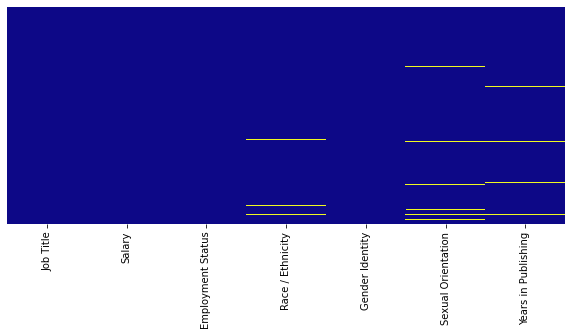

In [11]:
# Visualise missing data
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.heatmap(ukpub.isnull(),yticklabels=False,cbar=False,cmap='plasma')

That's good. It looks like we do not have much missing data in our dataset.

#### Years in Publishing

In [12]:
# Check value counts for years in publishing
ukpub['Years in Publishing'].value_counts(dropna=False)

3              150
4              141
5              126
2              118
7               75
6               67
1               61
Less than 1     53
8               52
10              34
9               25
12              22
11              20
15              13
NaN             13
14              12
13              10
20               8
16               5
18               4
19               3
21               2
24               2
25               1
27               1
Queer            1
17               1
26               1
Name: Years in Publishing, dtype: int64

In [13]:
# Replace all instances of 'Less than 1' to 0 in 'Years in Publishing' column
ukpub.loc[ukpub['Years in Publishing'] == 'Less than 1', 'Years in Publishing'] = 0

# Convert 'Years in Publishing' to numeric data type
ukpub['Years in Publishing'] = pd.to_numeric(ukpub['Years in Publishing'], errors='coerce')

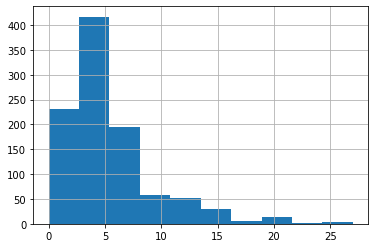

In [14]:
# Visualise the distribution of years in publishing
ukpub['Years in Publishing'].hist();

Here we can see that the values for years in publishing follow a somewhat normal distribution although it appears to be heavily right-skewed.

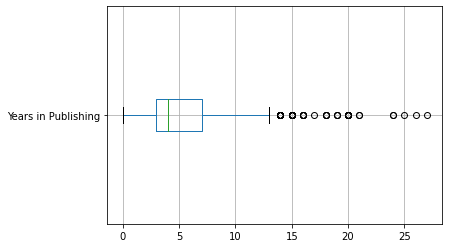

In [15]:
# Boxplot for years in publishing
ukpub.boxplot(column=['Years in Publishing'], vert=False);

We can see that we have some outliers towards the top end of the scale. This is not surprising given that the data  for years in publishing is positively skewed, however, we may have to remove some of these outliers before training our model.

In [16]:
# Descriptive statistics for years in publishing
ukpub[['Years in Publishing']].describe()

,Years in Publishing
count,1007.000000
mean,5.342602
std,4.129225
min,0.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,27.000000


In [17]:
# Due to the number of outliers we will fill the null values with median instad of mean
ukpub['Years in Publishing'].fillna(ukpub['Years in Publishing'].median(), inplace=True)

#### Gender Identity

In [18]:
# Check value counts for gender identity
ukpub['Gender Identity'].value_counts()

Woman (cisgender)                                                           884
Man (cisgender)                                                             110
Prefer not to say                                                            14
Non-binary                                                                    7
Woman (non-binary)                                                            2
https://unitetheunion.org/why-join/membership-types/unite-young-members/      1
Prefer to self-describe                                                       1
White (Scandinavian immigrant)                                                1
Name: Gender Identity, dtype: int64

Here we have a few strange values that we will need to deal with. From the 'Woman (non-binary)' down, it is unclear what these individuals' gender identity is so we will have to filter them out.

In [19]:
# Filter out those groups which have an unknown gender identity
ukpub = ukpub.groupby('Gender Identity').filter(lambda x: len(x) > 5)

# Remove '(cisgender)' from 'Woman' and 'Man' to make values easier to read
ukpub.loc[ukpub['Gender Identity'] == 'Woman (cisgender)', 'Gender Identity'] = 'Woman'
ukpub.loc[ukpub['Gender Identity'] == 'Man (cisgender)', 'Gender Identity'] = 'Man'

#### Sexual Orientation

In [20]:
# Check values for sexual orientation
ukpub['Sexual Orientation'].value_counts(dropna=False)

Straight                                          733
Bisexual                                          109
Prefer not to say                                  53
Queer                                              32
Gay                                                22
Questioning                                        16
Lesbian                                            14
Pansexual                                          12
NaN                                                12
Asexual                                             9
Demisexual                                          1
Asexual/Queer                                       1
no labels (not straight but sexuality is fake)      1
Name: Sexual Orientation, dtype: int64

In [21]:
# Because straight is by far the most common value, we will fill all null values with straight
ukpub['Sexual Orientation'].fillna(ukpub['Sexual Orientation'].mode()[0], inplace=True)

# Group all non-straight into a single category to simplify
ukpub.loc[ukpub['Sexual Orientation'] != 'Straight', 'Sexual Orientation'] = 'LGBTQ'

#### Race/Ethnicity

In [22]:
# Check unique values for race and ethnicity
ukpub['Race / Ethnicity'].unique()

array(['White', 'Black african ', 'British Indian', 'White British',
       'British Indian ', 'White British ', 'White Australian',
       'Black Caribbean ', 'Pakistani', 'Caucasian ', 'Black British ',
       'Black', 'White/Irish', 'Caucasian', 'White ', 'Asian',
       'Caucasian / Greek', 'Chinese', 'White, British',
       'White (Not British)', 'White/irish', 'White/British',
       'British Asian', 'Mixed (White British and British Indian)',
       'Mixed', 'Black/African-British', 'White (other)',
       'Mixed race - White and East Asian', 'white', 'White European',
       'South Asian ', 'White/European', 'South Asian', 'white british',
       'Mixed white and asian', 'White british', 'Black British',
       'Mixed - White/Asian', 'South-Asian', 'white (other)',
       'Mixed (White and Asian)', 'Mixed Afro/Indo Caribbean and White',
       'White/Irish ', 'British Asian ', 'South Asian origin',
       'British Asian - Indian ', 'Black African ',
       'British Asian - Ind

It seems like we have a lot of variation in the Race/Ethnicity column. We will have to reduce down the number of values by accurately grouping people into larger categories.

In [23]:
# Look at most common entries for race/ethnicity
ukpub['Race / Ethnicity'].value_counts().head()

White British     347
White             273
White              37
White British      30
White European     17
Name: Race / Ethnicity, dtype: int64

In [24]:
# With White British being the most common value here, we will fill all null values with White British
ukpub['Race / Ethnicity'].fillna(ukpub['Race / Ethnicity'].mode()[0], inplace=True)

# Correct specific values before applying function
ukpub.loc[ukpub['Race / Ethnicity'] == 'Not white', 'Race / Ethnicity'] = 'Other'
ukpub.loc[ukpub['Race / Ethnicity'] == 'Whote', 'Race / Ethnicity'] = 'White'
ukpub.loc[ukpub['Race / Ethnicity'] == 'British Insian', 'Race / Ethnicity'] = 'British Indian'

In [25]:
# Function for simplifying race/ethnicity
def simplify_race(x):
    if 'mixed' in x.lower():
        return 'Mixed'
    elif 'black' in x.lower() or 'bame' in x.lower():
        return 'Black'
    elif 'asian' in x.lower() or 'chinese' in x.lower() or 'indian' in x.lower() or \
                                 'pakistani' in x.lower() or 'bangladeshi' in x.lower():
        return 'Asian'
    elif 'white' in x.lower() or 'caucasian' in x.lower():
        return 'White'
    else:
        return 'Unknown'
    
# Apply function to race/ethnicity column
ukpub['Race / Ethnicity'] = ukpub['Race / Ethnicity'].apply(simplify_race)

In [26]:
# Check number of unique values for race/ethnicity
ukpub['Race / Ethnicity'].nunique()

5

#### Employment Status

In [27]:
# Check unique values for employment status
ukpub['Employment Status'].unique()

array(['Full-time', 'Contract', 'Part-time', 'Parental leave cover',
       'Part-Time (32 hours per week)',
       'full-time but no contract, paid hourly',
       "I have just left this job but feel it's important for it to be logged",
       'Left position in 2019 due to low salary',
       "Full Time but wasn't permanent - they made anyone who wasn't permanent take unpaid six week breaks before you reached two years and then would hire you again ",
       'Rolling temp contract', 'intern', 'Freelance'], dtype=object)

For employment status, we can group indivduals into either part-time, full-time, contract or other.

In [28]:
# Function for simplifying employment status
def simplify_employment_status(x):
    if 'part-time' in x.lower():
        return 'Part-time'
    elif 'full-time' in x.lower():
        return 'Full-time'
    elif 'contract' in x.lower():
        return 'Contract'
    else:
        return 'Other'
    
# Apply function to employment status column
ukpub['Employment Status'] = ukpub['Employment Status'].apply(simplify_employment_status)

#### Salary

In [29]:
ukpub[['Salary']].head(10)

,Salary
0,£36k
1,"23,000 per annum"
2,"£23,000"
3,"£28,000"
4,£115 per day
5,"£21k starting, £27k 5 years later"
6,31000
7,"£25,000 entering in Sept 2016, £29,248.44 exit..."
8,25.5k
9,"£26,600"


For salary, we can see that there is a lot of variation in the types of entries that people have made. Some salary entries contain quite a bit of textual information whereas other entries are given in many different formats. We will have to standardise all of these values if we want to do any further analysis with them. Specifically, we want to extract just the numerical yearly salary for each individual. This will be important when training our model.

Due to the large number of variation in how people have stated their salaries, I have decided to use regular expressions to attempt to parse out as much of the relevant numerical salary data as possible.

In [30]:
# Use a variety of regular expressions to extract correct salary values
def extract_salary(x):
    if re.search(r"^£\d+,[0-9]{3}.{0,21}$", x):
        return x.replace(',', '')[1:6]
    elif re.search(r"^£?\d\d[kK]\s?$", x): 
        return x[-3:-1] + "000"
    elif re.search(r"^\d+[,.\s]\s?0", x):
        return x[:2] + "000"
    elif re.search(r"^\d+[,.\s]\s?0{3}", x):
        return x[0:2] + "000"
    elif re.search("^£?\d{5}0?", x):
        x = x.strip('£')
        if '.' in x:
            return x[:5]
        else:
            return x.split(' ')[0]
    elif re.search(r"[kK]$", x):
        if '.' in x:
            return x.split('.')[0][-2:] + x.split('.')[1][0] + "00"
        elif '-' in x:
            return x.split('-')[1][:2] + "000"
        else:
            return x[-3:-1] + "000"
    else:
        return x

In [31]:
# Map function to each salary element
ukpub['Salary'] = ukpub['Salary'].map(extract_salary)

In [32]:
# Check some of the salary values
ukpub[['Salary']].head(10)

,Salary
0,36000
1,23000
2,23000
3,28000
4,£115 per day
5,"£21k starting, £27k 5 years later"
6,31000
7,"£25,000 entering in Sept 2016, £29,248.44 exit..."
8,25500
9,26600


It looks like we were able to extract many of the salary values using the regular expressions, but we can still see that there are some salaries that were not successfully extracted. As this is a small dataset, we can manually amend all of the remaining salary values.

In [33]:
# Correct salary values for those whose salaries were not extracted by the regular expressions

# £115 per day ---> (52(week)*5(work days) - 20(days holiday))*115(day rate)
ukpub.loc[ukpub['Salary'] == '£115 per day ', 'Salary'] = '27600'

# # £21k starting, £27k 5 years later 
ukpub.loc[ukpub['Salary'] == '£21k starting, £27k 5 years later ', 'Salary'] = '27000'

# £25,000 entering in Sept 2016, £29,248.44 exiting in Sept 2019
ukpub.loc[ukpub['Salary'] == '£25,000 entering in Sept 2016, £29,248.44 exiting in Sept 2019', 'Salary'] = '29248'

# £30,000 (as of 2020; started role in 2016)
ukpub.loc[ukpub['Salary'] == '£30,000 (as of 2020; started role in 2016)', 'Salary'] = '30000'

# 20k starting
ukpub.loc[ukpub['Salary'] == '20k starting', 'Salary'] = '20000'

# 34
ukpub.loc[ukpub['Salary'] == '34', 'Salary'] = '34000'

# 28.50£
ukpub.loc[ukpub['Salary'] == '28.50£', 'Salary'] = '28500'

# £25, 000
ukpub.loc[ukpub['Salary'] == '£25, 000', 'Salary'] = '25000'

# approx £11-13,000 p.a.
ukpub.loc[ukpub['Salary'] == 'approx £11-13,000 p.a.', 'Salary'] = '13000'

# £38.5k (increase to £40k delayed by covid)
ukpub.loc[ukpub['Salary'] == '£38.5k (increase to £40k delayed by covid)', 'Salary'] = '40000'

# 21.5
ukpub.loc[ukpub['Salary'] == '21.5', 'Salary'] = '21500'

# £24K annually 
ukpub.loc[ukpub['Salary'] == '£24K annually ', 'Salary'] = '24000'

# £18,000 (£19k after 6-month probation)
ukpub.loc[ukpub['Salary'] == '£18,000 (£19k after 6-month probation)', 'Salary'] = '19000'

# £23k to start rising to £23,500
ukpub.loc[ukpub['Salary'] == '£23k to start rising to £23,500', 'Salary'] = '23500'

# £26 266
ukpub.loc[ukpub['Salary'] == '£26 266', 'Salary'] = '26266'

# 28
ukpub.loc[ukpub['Salary'] == '28', 'Salary'] = '28000'

# £15.5k (2015), £16.9k (2016), £18.9k (2017)
ukpub.loc[ukpub['Salary'] == '£15.5k (2015), £16.9k (2016), £18.9k (2017)', 'Salary'] = '18900'

# £22,000 start, £24,000 2 years on
ukpub.loc[ukpub['Salary'] == '£22,000 start, £24,000 2 years on', 'Salary'] = '24000'

# 31'800
ukpub.loc[ukpub['Salary'] == "31'800", 'Salary'] = '31800'

# £38
ukpub.loc[ukpub['Salary'] == '£38', 'Salary'] = '38000'

# £28k pro rata
ukpub.loc[ukpub['Salary'] == '£28k pro rata', 'Salary'] = '28000'

# 34,850 (full time)
ukpub.loc[ukpub['Salary'] == '34,850 (full time)', 'Salary'] = '34850'

# 5k000
ukpub.loc[ukpub['Salary'] == '5k000', 'Salary'] = '50000'

# Started at £21500 but increased to £22500 after a year
ukpub.loc[ukpub['Salary'] == 'Started at £21500 but increased to £22500 after a year', 'Salary'] = '22500'

In [34]:
# Drop rows where people do not make a salary

# List of entries that indicate no salary
no_salary = ['Unpaid with £100/week stipend', '0']

# Find indexes of people with no salary
ppl_no_salary = ukpub[ukpub['Salary'].isin(no_salary)].index

# Remove people with no salary 
ukpub = ukpub[~ukpub.index.isin(ppl_no_salary)]

# With the salaries now standardised, we can convert them to numeric data type
ukpub['Salary'] = ukpub['Salary'].astype('int64')

In [35]:
# Check to see what our data now looks like after cleaning
ukpub.head(10)

,Job Title,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing
0,Marketing manager,36000,Full-time,White,Woman,Straight,3.0
1,Early careere coordinator,23000,Full-time,Black,Woman,LGBTQ,2.0
2,Audience and Digital Development Assistant,23000,Full-time,Asian,Woman,Straight,1.0
3,Publicity Officer,28000,Full-time,White,Woman,LGBTQ,3.0
4,Creative art worker,27600,Contract,Asian,Woman,Straight,7.0
5,Executive (marketing and operations),27000,Full-time,White,Woman,Straight,6.0
6,Project & Brand Exec,31000,Full-time,White,Woman,Straight,3.0
7,Coordinator (Creative Responsibility),29248,Full-time,White,Woman,Straight,3.0
8,Corporate responsibility assistant,25500,Full-time,Black,Woman,Straight,1.0
9,Press Officer,26600,Full-time,White,Woman,LGBTQ,4.0


Our data looks much cleaner. We can now proceed with the EDA.

**[Back to Top](#top)** <br>

<a id="eda"></a>
### 7. EDA
---

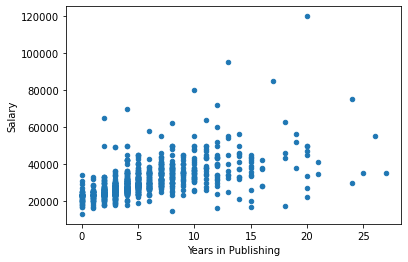

In [36]:
# Checking the relationship between salary and years in publishing
ukpub.plot(kind='scatter', x='Years in Publishing', y='Salary');

We can see here that there does appear to be a relationship between years in publishing and salary however the variability in salary seems to increase as years in publishing increases. This could mean that the data is heteroscedastic and we may have to take this into account when evaluating our model. 

We can also see an outlier with a salary of £120,000 for 20 years in publishing. While this may be a plausible salary value, we will omit this individual when we remove outliers as it may skew the results of our analysis and predicitons.

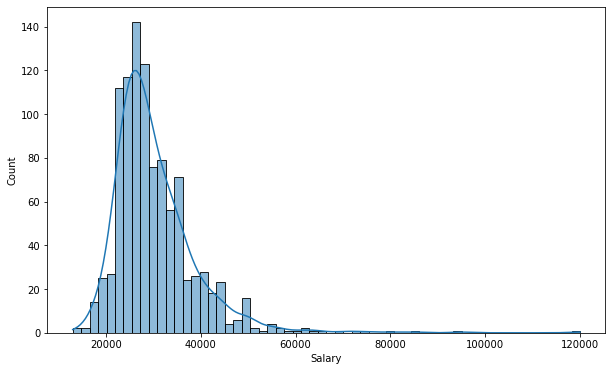

In [37]:
# Visualise the distribution of salary
plt.figure(figsize=(10, 6))
sns.histplot(ukpub['Salary'], kde=True);

It appears that salary is somewhat normally distributed but also has positive skew, albeit not as much as years in publishing.

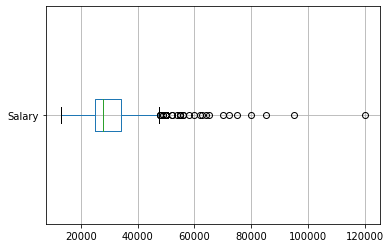

In [38]:
# Boxplot for salary
ukpub.boxplot(column = ['Salary'], vert=False);

Here we can see the outliers for our dependent variable (Salary). 

We will remove the top and bottom .05% from salary and years in publishing so that the data better reflects the overall distribution.

In [39]:
# Removing top .05% and bottom .05% of Salary values
ukpub = ukpub[(ukpub['Salary'] < ukpub['Salary'].quantile(.995)) & 
                         (ukpub['Salary'] > ukpub['Salary'].quantile(.005))]

# Removing top .05% and bottom .05% of Years in Publishing values
ukpub = ukpub[(ukpub['Years in Publishing'] < ukpub['Years in Publishing'].quantile(.995)) & 
                         (ukpub['Years in Publishing'] > ukpub['Years in Publishing'].quantile(.005))]

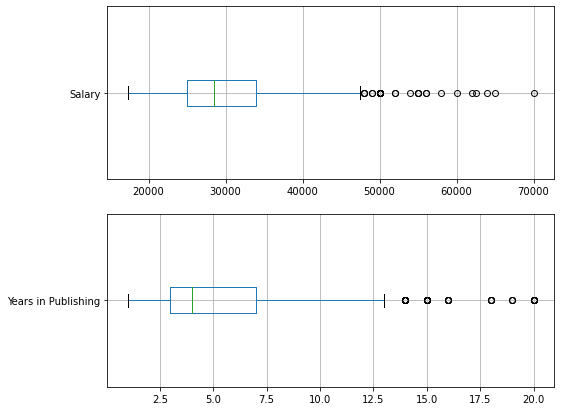

In [40]:
# Boxplots for salary and years in publishing with outliers removed
fig, axes = plt.subplots(2,1, figsize=(8,7))
ukpub.boxplot(column = ['Salary'], vert=False, ax=axes[0]);
ukpub.boxplot(column = ['Years in Publishing'], vert=False, ax=axes[1]);

This looks a little better. We still have outliers but because we have eliminated some of the higher values, the data now appears to be slightly better distributed. This will help when fitting a model to our data.

In [41]:
# Correlation between salary and years in publishing
ukpub.corr()

,Salary,Years in Publishing
Salary,1.000000,0.593085
Years in Publishing,0.593085,1.000000


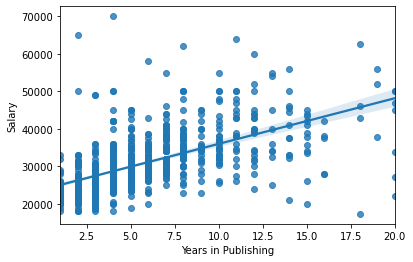

In [42]:
# Regplot showing the relationship between years in publishing and salary (outliers removed)
sns.regplot(x='Years in Publishing', y='Salary', data=ukpub);

With the outliers removed, we can see that although there does appear to be a positive relationship, there are a lot of data points that are not captured accurately by the regression line. This could mean that a linear model may not be the best model to explain the relationship between years in publishing and salary.

Chart for Employment Status | Total = 4


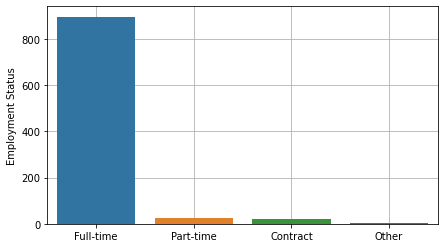

Chart for Race / Ethnicity | Total = 5


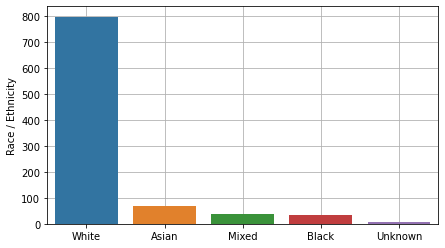

Chart for Gender Identity | Total = 4


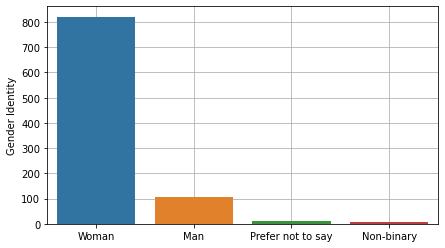

Chart for Sexual Orientation | Total = 2


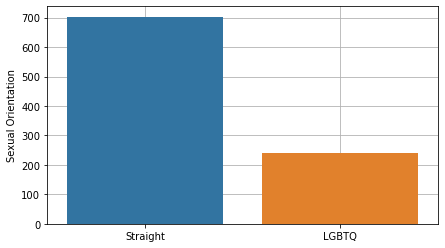

Chart for Years in Publishing | Total = 19


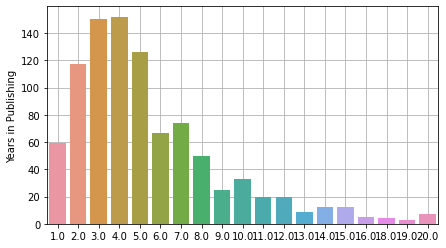

In [43]:
# Barplots for each of the features
for feature in ukpub.columns[2:7]:
    feature_num = ukpub[feature].value_counts()
    print(f"Chart for {feature} | Total = {len(feature_num)}")
    plt.figure(figsize=(7,4))
    chart = sns.barplot(x=feature_num.index, y=feature_num, zorder=2)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.grid()
    plt.show()

From these graphs, we can see that the majority of our dataset consists of straight, white women who work full-time. We can also see that the majority of individuals in our data have spent around 2-5 years in publishing.

,Salary,Years in Publishing
Race / Ethnicity,,
Unknown,33871.428571,8.285714
White,30634.086466,5.548872
Asian,29950.800000,4.700000
Mixed,29086.111111,5.333333
Black,26854.411765,3.617647


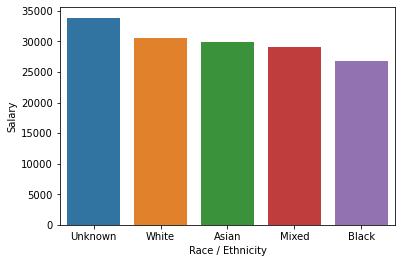

In [44]:
# Pivot table for average salary and average years in publishing for race/ethnicity
display(pd.pivot_table(ukpub, index='Race / Ethnicity', 
    values=['Salary', 'Years in Publishing']).sort_values('Salary', 
    ascending=False))

# Plot graph showing mean salary amount for race/ethnicity
race_salary = pd.pivot_table(ukpub, index='Race / Ethnicity', values='Salary').sort_values('Salary', ascending=False)
sns.barplot(x=race_salary.index, y="Salary", data=race_salary);

Interestingly, it appears that those whose race and ethnicity is unknown not only earn the highest salary on average but have also spent the most amount of years in publishing on average. This could mean that those in better paid positions who have worked in publishing for longer feel less inclined to share their race or ethnicity but this is just speculation.

,Salary,Years in Publishing
Gender Identity,,
Man,30597.066038,5.943396
Prefer not to say,30509.090909,6.909091
Woman,30390.886724,5.342266
Non-binary,30000.000000,5.428571


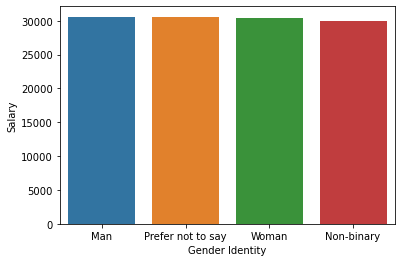

In [45]:
# Pivot table for average salary and average years in publishing for gender identity
display(pd.pivot_table(ukpub, index='Gender Identity', 
    values=['Salary', 'Years in Publishing']).sort_values('Salary', ascending=False))

# Plot graph showing mean salary amount for gender identity
gender_salary = pd.pivot_table(ukpub, index='Gender Identity', values='Salary').sort_values('Salary', ascending=False)
sns.barplot(x=gender_salary.index, y="Salary", data=gender_salary);

Here we can see that on average, all genders earn roughly equal salaries.

,Salary,Years in Publishing
Sexual Orientation,,
Straight,30692.786629,5.509246
LGBTQ,29598.256198,5.194215


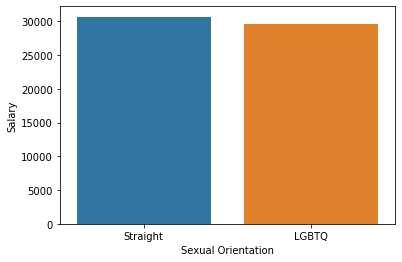

In [46]:
# Pivot table for average salary and average years in publishing for sexual orientation
display(pd.pivot_table(ukpub, index='Sexual Orientation', 
    values=['Salary', 'Years in Publishing']).sort_values('Salary', ascending=False))

# Plot graph showing mean salary amount for Sexual Orientation
sexori_salary = pd.pivot_table(ukpub, index='Sexual Orientation', values='Salary').sort_values('Salary', ascending=False)
sns.barplot(x=sexori_salary.index, y="Salary", data=sexori_salary);

Similarly, it appears that on average, people of different sexual orientation earn roughly equal salaries.

,Salary
Years in Publishing,
1.0,23681.508475
4.0,29266.782895
7.0,34449.567568
10.0,37012.121212
13.0,39500.000000
16.0,34700.000000
20.0,39277.428571


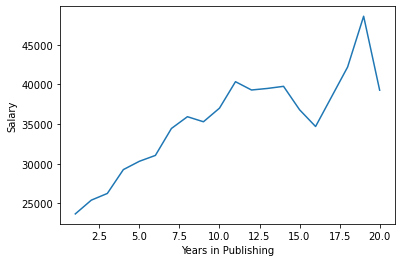

In [47]:
# Pivot table for average salary and average years in publishing for sexual orientation
display(pd.pivot_table(ukpub, index='Years in Publishing', 
                       values=['Salary']).sort_index()[::3])

# Plot graph showing mean salary amount for Each year or Years in Publishing
yip_salary = pd.pivot_table(ukpub, index='Years in Publishing', values='Salary').sort_values('Salary', ascending=False)
sns.lineplot(x=yip_salary.index, y="Salary", data=yip_salary);

Here we can see that after around the 13 year mark for years in publishing, the linear relationship starts to break down and becomes more unstable. This is consistent to what we saw in our regression plot earlier. 

One reason for this could be that there is steady career progression up until around 13 years in the industry at which point people either take a lower paid role or a move into a higher paid role. However, we also have to remember that there may be macroeconomic factors, such as financial crises, that may explain this pattern. 

In [48]:
ukpub.sort_values('Salary', ascending=False).head(10)

,Job Title,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing
561,A senior director in editorial,70000,Full-time,White,Man,Straight,4.0
61,Head of Sales,65000,Full-time,White,Woman,Straight,2.0
747,Senior Editor,64000,Full-time,White,Man,Straight,11.0
784,Publishing Director,62500,Full-time,White,Man,LGBTQ,18.0
601,Senior Sales Manager,62000,Full-time,White,Woman,Straight,8.0
794,Publisher,60000,Full-time,White,Woman,Straight,12.0
839,Editorial Director,58000,Full-time,White,Woman,Straight,6.0
605,Publisher,56000,Full-time,White,Woman,Straight,19.0
569,Publisher,56000,Full-time,White,Woman,LGBTQ,14.0
640,Publishing director,55000,Full-time,White,Man,Straight,7.0


Here we can see the top 10 individuals in terms of highest salary.

In [49]:
ukpub.sort_values('Salary', ascending=False).tail(10)

,Job Title,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing
438,Editorial Assistant,19000,Full-time,Asian,Woman,LGBTQ,5.0
750,Editorial Assistant,18900,Other,White,Woman,LGBTQ,3.0
774,Editorial Assistant,18500,Contract,White,Woman,LGBTQ,3.0
13,Digital Marketing Assistant,18000,Full-time,Asian,Man,LGBTQ,2.0
822,Publicity Assistant,18000,Full-time,Asian,Woman,Straight,3.0
927,Sales Assistant,18000,Full-time,White,Woman,Straight,4.0
830,Rights Assistant,18000,Full-time,Mixed,Woman,Straight,2.0
715,Press Officer,18000,Other,White,Woman,Straight,2.0
686,Marketing and Editorial Assistant,18000,Full-time,White,Woman,LGBTQ,1.0
915,Contracts Manager,17300,Part-time,White,Man,Straight,18.0


And here are the bottom 10 individuals in terms of lowest salary. It seems unusual here that an individual with 18 years in publishing has the lowest salary in our data. This may be an error, however we cannot be sure. Nevertheless, we will keep them in our data going forward.

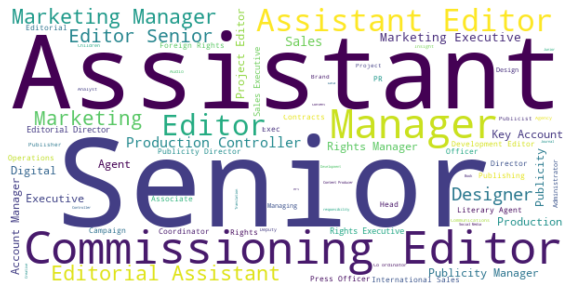

In [50]:
# Word Cloud for Job Titles
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Set up text
text = " ".join(title for title in ukpub['Job Title'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, random_state=21, background_color="white", width=600, height=300)
wordcloud.generate(text)

# Display the generated image
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the wordcloud of job titles, it appears that people mostly occupy either assistant or senior positions, however, as this is a small dataset, it could just be that this is only reflective of the small sample size.

**[Back to Top](#top)** <br>

<a id="model_building"></a>
## 8. Model Building
---

Now lets move on to exploring a few different linear models to see if we can predict an individual's salary based on the features that we have.

### Simple Linear Regression

In [51]:
# Remove string data
ukpub_final = ukpub.drop(['Job Title'], axis=1)

#### Using sklearn

In [52]:
# Import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [53]:
# Isolating independent and dependent variables
X1 = ukpub_final['Years in Publishing'].values.reshape(-1,1)
y1 = ukpub_final['Salary'].values.reshape(-1,1)

In [54]:
# Create train/test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [55]:
# Create model and fit to the training data
lrm = LinearRegression()
lrm.fit(X_train1, y_train1)
print(f"R²: {lrm.score(X_train1, y_train1)}")
print(f"Intercept: {lrm.intercept_[0]}")
print(f"Coefficient: {lrm.coef_[0][0]}")

R²: 0.3826897803011434
Intercept: 23227.84961226084
Coefficient: 1365.2846751012742


Here we can see that the R² value is not very high. This means that years in publishing only explains around 38% of the variance in salary. The intercept and coefficient tell us that starting from a salary of £23,227.85, for every year increase in years in publishing we can expect to see a salary increase of around £1365.28.

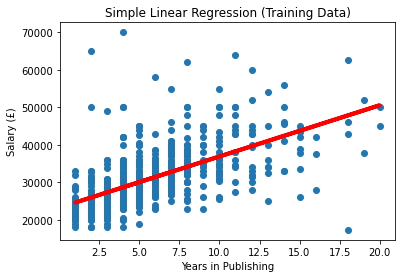

In [56]:
# Make prediction using the training data and then plot the results
y_hat1 = lrm.predict(X_train1)
plt.scatter(X_train1, y_train1)
plt.plot(X_train1, y_hat1, linewidth=4, color='red')
plt.title('Simple Linear Regression (Training Data)')
plt.xlabel('Years in Publishing')
plt.ylabel('Salary (£)')
plt.show()

In [57]:
# Make a prediction using the model on a single value
y_hat1b = lrm.predict([[10]])
print(f"Estimated salary based on 10 years in publishing: £{round(y_hat1b[0][0])}")

Estimated salary based on 10 years in publishing: £36881


Here we can see why the R² value is low. For example, if you took an individual who worked for 10 years in publishing the model would predict a salary of £36881, however as we can see from the plot above, the real salary could be anywhere between £25000 and £55000.

Let's check the residuals of our model to see if they satisfy some of the assumptions of a linear regression.

In [58]:
# Check that the mean of the residuals is equal to zero
residuals = y_train1-y_hat1
mean_residuals = np.mean(residuals)
print(f"Mean of Residuals: {mean_residuals}")

Mean of Residuals: -2.1558392930913853e-12


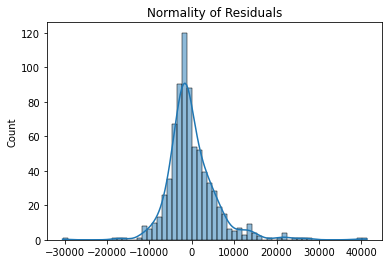

In [59]:
# View the normality of error terms/residuals
sns.histplot(residuals, kde=True, legend=False)
plt.title('Normality of Residuals');

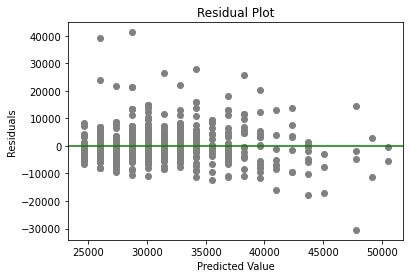

In [60]:
# Checking for heteroscedasticty
plt.plot(y_hat1, residuals, 'o', color='grey')
plt.title("Residual Plot")
plt.axhline(0, color='g')
plt.xlabel("Predicted Value")
plt.ylabel("Residuals");

This plot shows us that we may have heteroscedasticity in our data. If that is the case, the standard errors for our coefficients as well as the overall F-statistic will be unreliable. We will investigate this further when we use the statsmodels package.

Now let's test our model on the testing data.

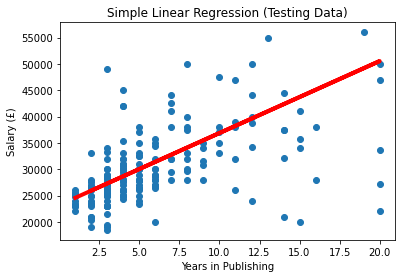

In [61]:
# Make prediction using the test data and then plot the results
y_hat_test1 = lrm.predict(X_test1)
plt.scatter(X_test1, y_test1)
plt.plot(X_test1, y_hat_test1, linewidth=4, color='red')
plt.title('Simple Linear Regression (Testing Data)')
plt.xlabel('Years in Publishing')
plt.ylabel('Salary (£)')
plt.show()

We can see that our line of best fit does not do a great job of accurately fitting the data.

Let's calculate the residual errors to see just how far off our predictctions would be with this model.

In [62]:
# Checking the residual errors of our model
mae = mean_absolute_error(y_hat_test1, y_test1)
rmse = math.sqrt(mean_squared_error(y_hat_test1, y_test1))
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 4347.076153385423
RMSE: 6462.4927506954355


Looking at our RMSE value, we can confirm that our model is not very accurate at this point. A RMSE of 6462 means that our predictions could be off by £6462. This is quite a high margin of error given the relatively small salary range (£17300 - £70000).

#### Using statsmodels

Now we will use the statsmodels package to train a simple linear regression model. This will give us some more insight into the precise statistics of our model. We will then train a multiple regression model with more of the features from our dataset to see if that improves the model.

In [63]:
# Import statsmodels package
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [64]:
# Separate independent and dependent variables
X1b = ukpub_final['Years in Publishing']
y1b = ukpub_final['Salary']

In [65]:
# Add constant
X1b = add_constant(X1b)

In [66]:
# Create train/test split
X_train1b, X_test1b, y_train1b, y_test1b = train_test_split(X1b, y1b, test_size=0.2, random_state=0)

In [67]:
# Create and fit sm model
lrm_sm1b = sm.OLS(y_train1b, X_train1b).fit()
print(lrm_sm1b.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     467.4
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           4.90e-81
Time:                        15:09:41   Log-Likelihood:                -7640.5
No. Observations:                 756   AIC:                         1.528e+04
Df Residuals:                     754   BIC:                         1.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.323e+04    

We can see much more detail about our model here. The R², Intercept and Coefficeint values are the same as our sklearn linear regression model as expected. Our F-statistic p-value at <0.05 indicates that the model overall is significant. However, the Jarque-Bera test is statistically significant at <0.05 indicating that the data is not normally distibuted. We can see this more clearly from the Q-Q plot below.

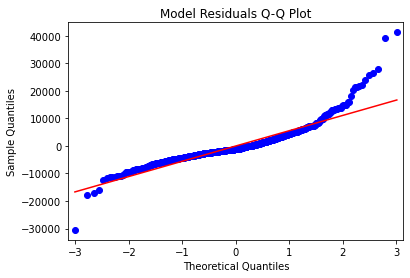

In [68]:
# Checking the model's normality of residuals (Q-Q Plot)
sm.qqplot(lrm_sm1b.resid, line='r')
plt.title("Model Residuals Q-Q Plot");

This shows that our data does not come from a normal distribution.

We also saw earlier that our data looked like it may have heteroscedasticity so let's run a formal test to see if that is the case. I will use a Breusch-Pagan test in this instance.

In [69]:
# Breusch-Pagan test for detecting heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan as bp
from statsmodels.compat import lzip
name = ['Lagrange Multiplier Statistic', 'p-value', 
        'F-value', 'F p-value']
test = bp(lrm_sm1b.resid, lrm_sm1b.model.exog)
lzip(name, test)

[('Lagrange Multiplier Statistic', 17.855624100697206),
 ('p-value', 2.383138925259988e-05),
 ('F-value', 18.239169749851612),
 ('F p-value', 2.1973152664810536e-05)]

As we can see, the Breusch-Pagan test is significant meaning the data violates the assumption of homoscedasticity. In other words, heteroscedasticity is present in the data and the standard errors will be biased.

Because of this we will use a robust regression method that accounts for the heteroscedasticity.

In [70]:
# OLS robust accounting for heteroscedasticity
lrm_sm1b = sm.OLS(y_train1b, X_train1b).fit(cov_type='HC0')
print(lrm_sm1b.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     244.1
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           6.95e-48
Time:                        15:09:44   Log-Likelihood:                -7640.5
No. Observations:                 756   AIC:                         1.528e+04
Df Residuals:                     754   BIC:                         1.529e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.323e+04    

Accounting for the heteroscedasiticity has altered the F-statistics and the standard errors which makes this a more accurate summary of our model.

### Multiple Linear Regression

We will now try to use a multiple linear regression to see if we can improve upon our simple linear model.

In [71]:
# Separate independent variables from dependent variable
X2 = ukpub_final.drop(['Salary'], axis=1)
y2 = ukpub_final['Salary']

In [72]:
# Create dummy variables for categorical columns
X2 = pd.get_dummies(X2, drop_first=True)

# Add constant
X2 = add_constant(X2)

In [73]:
# Check VIF to determine if we have multicollinearity amongst the independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X2.columns
vif["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif

,Features,VIF
0,const,68.209561
1,Years in Publishing,1.084459
2,Employment Status_Full-time,2.401143
3,Employment Status_Other,1.211084
4,Employment Status_Part-time,2.271505
5,Race / Ethnicity_Black,1.451397
6,Race / Ethnicity_Mixed,1.478644
7,Race / Ethnicity_Unknown,1.150264
8,Race / Ethnicity_White,1.959490
9,Gender Identity_Non-binary,1.074850


This tells us that we do not have multicollinearity amongst our independent variables.

In [74]:
# Create train/test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [75]:
# Create and fit sm model accounting for heteroscedasticity
mlr_sm2 = sm.OLS(y_train2, X_train2).fit(cov_type='HC0')
print(mlr_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     29.15
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           1.23e-54
Time:                        15:09:46   Log-Likelihood:                -7630.2
No. Observations:                 756   AIC:                         1.529e+04
Df Residuals:                     743   BIC:                         1.535e+04
Df Model:                          12                                         
Covariance Type:                  HC0                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Here we can see the summary statistics from our multiple linear regression model. The summary shows us that many of our features are statistically insignificant (p-value >0.05) so we will remove them and run the model again.

In [76]:
# Removing the features that were not significant
not_significant = [
    'Employment Status_Full-time',
    'Race / Ethnicity_Black',
    'Race / Ethnicity_Mixed',
    'Race / Ethnicity_Unknown',
    'Race / Ethnicity_White',
    'Gender Identity_Non-binary',
    'Gender Identity_Prefer not to say',
    'Gender Identity_Woman',
    'Sexual Orientation_Straight',
]
X3 = X2.drop(not_significant, axis=1)
y3 = ukpub_final['Salary']

In [77]:
# Create train/test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [78]:
# Create and fit sm model accounting for heteroscedasticity
mlr_sm3 = sm.OLS(y_train3, X_train3).fit(cov_type='HC0')
print(mlr_sm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     111.3
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           1.20e-59
Time:                        15:09:48   Log-Likelihood:                -7633.1
No. Observations:                 756   AIC:                         1.527e+04
Df Residuals:                     752   BIC:                         1.529e+04
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [79]:
from statsmodels.tools.eval_measures import rmse

# Generate predictions
y_hat3 = mlr_sm3.predict(X_test3)

# Calc RMSE
rmse3 = rmse(y_test3, y_hat3)
print(f'RMSE: {rmse3}')

RMSE: 6165.172848119142


Our RMSE is now down from 6462 to 6165 which means that our multiple linear regression is an improvement on our simple linear model, however, the value is still high indicating that we might be better off using a different model to capture the relationship between the independent variables and the dependent variable.

Lastly, we will perform cross-validation so that we can see how the model is likely to generalise on new data.

In [80]:
# 5-fold cross-validation
from sklearn.model_selection import cross_val_score

X4 = X3.copy()
y4 = y3.copy()

# Create model and run cross-validation
lrm_4 = LinearRegression()
scores2 = cross_val_score(lrm_4, X4, y4, cv=5, scoring='neg_mean_squared_error')
print(f'Average RMSE: {np.mean(np.sqrt(np.abs(scores2)))}')

Average RMSE: 5901.034319537699


This RMSE is consistent with what we have seen in our previous models which indicates that it is representative of our model however there is still a large error associated with it.

<a id="conclusion"></a>
## 9. Conclusion
---

An analysis was undertaken to analyse the self-reported salaries of individuals who work at different levels within the publishing industry in the UK. It was found that the majority of individuals in the data were straight, white women who occupy full-time positions. Individuals whose race and ethnicty was unknown were on average the highest earners and had spent the most amount of years in publishing. Between 0 and around 13 years in publishing, salary on average increased gradually however after 13 years the relationship between years in publishing and salary became much more unpredictable.

A simple regression analysis was used to test if years in publishing could predict an individual's salary in the publishing industry. The results of the simple regression indicated that years in publishing explains around 38.3% of the variance in salary (R²=0.38, F(1,754)=244.1, p<0.01) after accounting for heteroscedasticity.

A multiple regression analysis was also used to test if employment status, race/ethnicity, gender identity, sexual orientation and years in publishing could predict an individual's salary in the publishing industry. The results of the multiple regression indicated that the five predictors explained 39% of the variance in salary (R²=0.39, F(12,743)=29.15, p<0.01) after accounting for heteroscedasticity. However, only years in publishing, employment status(part-time) and employment status(other) were statistically significant predictors of salary.

After removing the non-significant predictors, a final multiple regression analysis was used with just years in publishing, employment status(part-time) and employment status(other). The results of the multiple regression indicated that the three predictors explained 39.2% of the variance in salary (R²=0.39, F(3,752)=111.3, p<0.01) after accounting for heteroscedasticity.

After performing a 5-fold cross-validation with the final model, the average RMSE was 5901. Taken together with the above results, it can be concluded that the relationship between the features and salary is weak and the margin of error is high. Therefore, the model is not a good fit for the data and it may be explained better by using either a different regression model or a different type of model altogether.

<a id="future_recommendations"></a>
## 10. Future Recommendations
---

While our model was not very accurate, there are some insights we can take away to try and find a better model. Some recommendations for future work include:

- Looking more into the job titles individuals have to see if there are any particular patterns between specific roles and salaries.

- Combining the data with other sources to increase the number of features and make better predictions.

- Transforming the independent and dependent variables to make them more representative of a normal distribution before training the model.

- Using non-linear models to try and better capture the relationship between the features and salary.

**[Back to Top](#top)** <br>